<a href="https://colab.research.google.com/github/kcast03/DataScienceCustomerPersonalityAnalysis/blob/main/notebook_firstDeliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

#!pip install plotly --upgrade

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline


In [ ]:
# Import the dataset
df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

In [ ]:
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

# Data Cleaning

In [ ]:
# Check for missing data
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<AxesSubplot:>

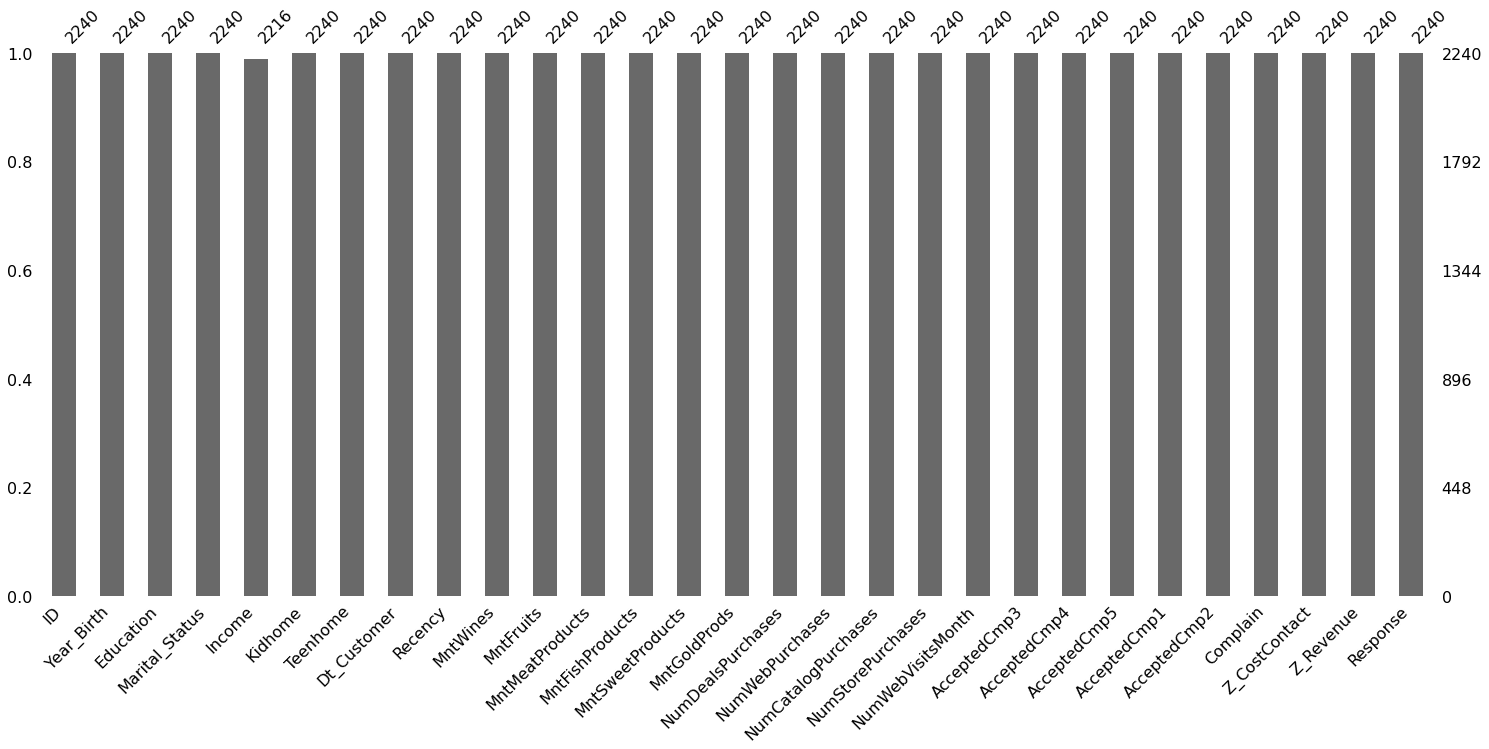

In [ ]:
# Visualize missing data

msno.bar(df)

In [ ]:
# Delete all rows with NA values of income
df = df.dropna()

Since there is only missing data in one attribute and it only contributes to less than 2% of the data, it is best to drop the values and keep accurate data.

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# Detect outliers

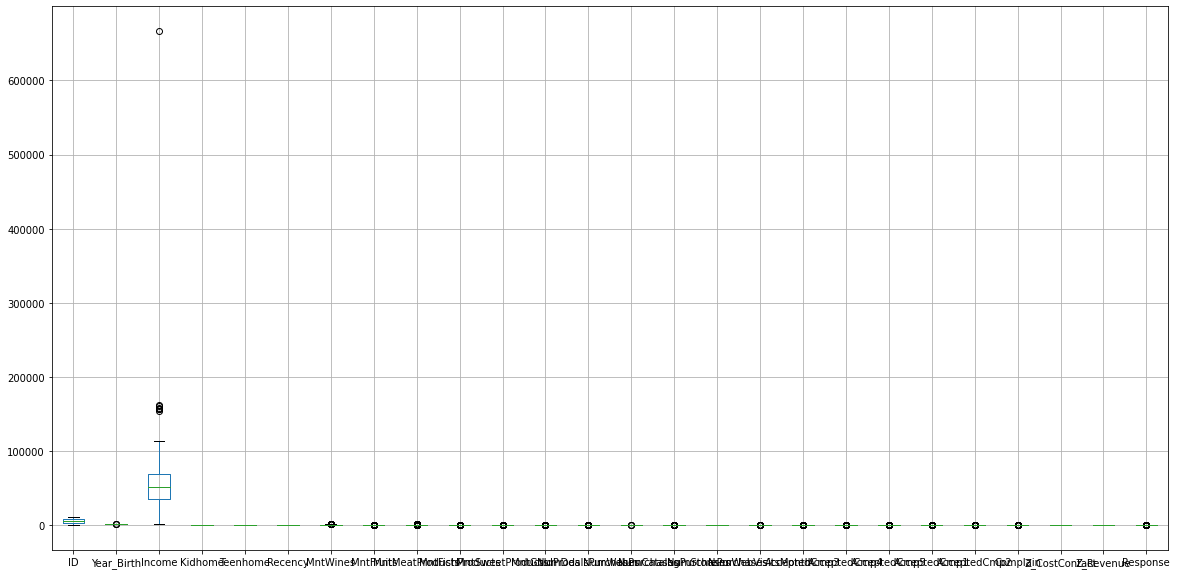

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

df.boxplot()
plt.show()

 From here we can see income is the column with most outliers

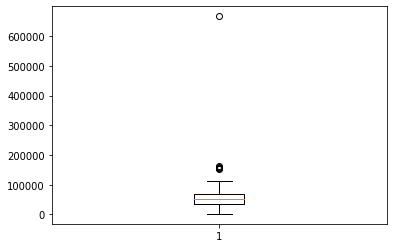

In [ ]:
# Visualize the outliers from income column
plt.boxplot(df['Income'])
plt.show()

In [ ]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Here we can see that the max value of income is way higher than the 75th percentile. This is our outlier that could mess with our model later on so it is best to delete it.


In [ ]:
df.drop(df.index[df['Income'] == df['Income'].max()], inplace = True)

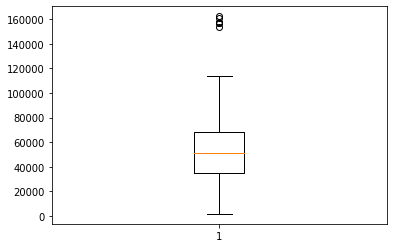

In [ ]:
# Visualize the Income column to see if we deleted outliers
plt.boxplot(df['Income'])
plt.show()

In [ ]:
# Remove unnecessary data
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Z_CostContact: 100.00%
3    2215
Name: Z_CostContact, dtype: int64

Z_Revenue: 100.00%
11    2215
Name: Z_Revenue, dtype: int64



In [ ]:
# Drop columns with similar data
df = df.drop(['Z_CostContact','Z_Revenue'], axis = 1)

# Data Feature Engineering


<AxesSubplot:>

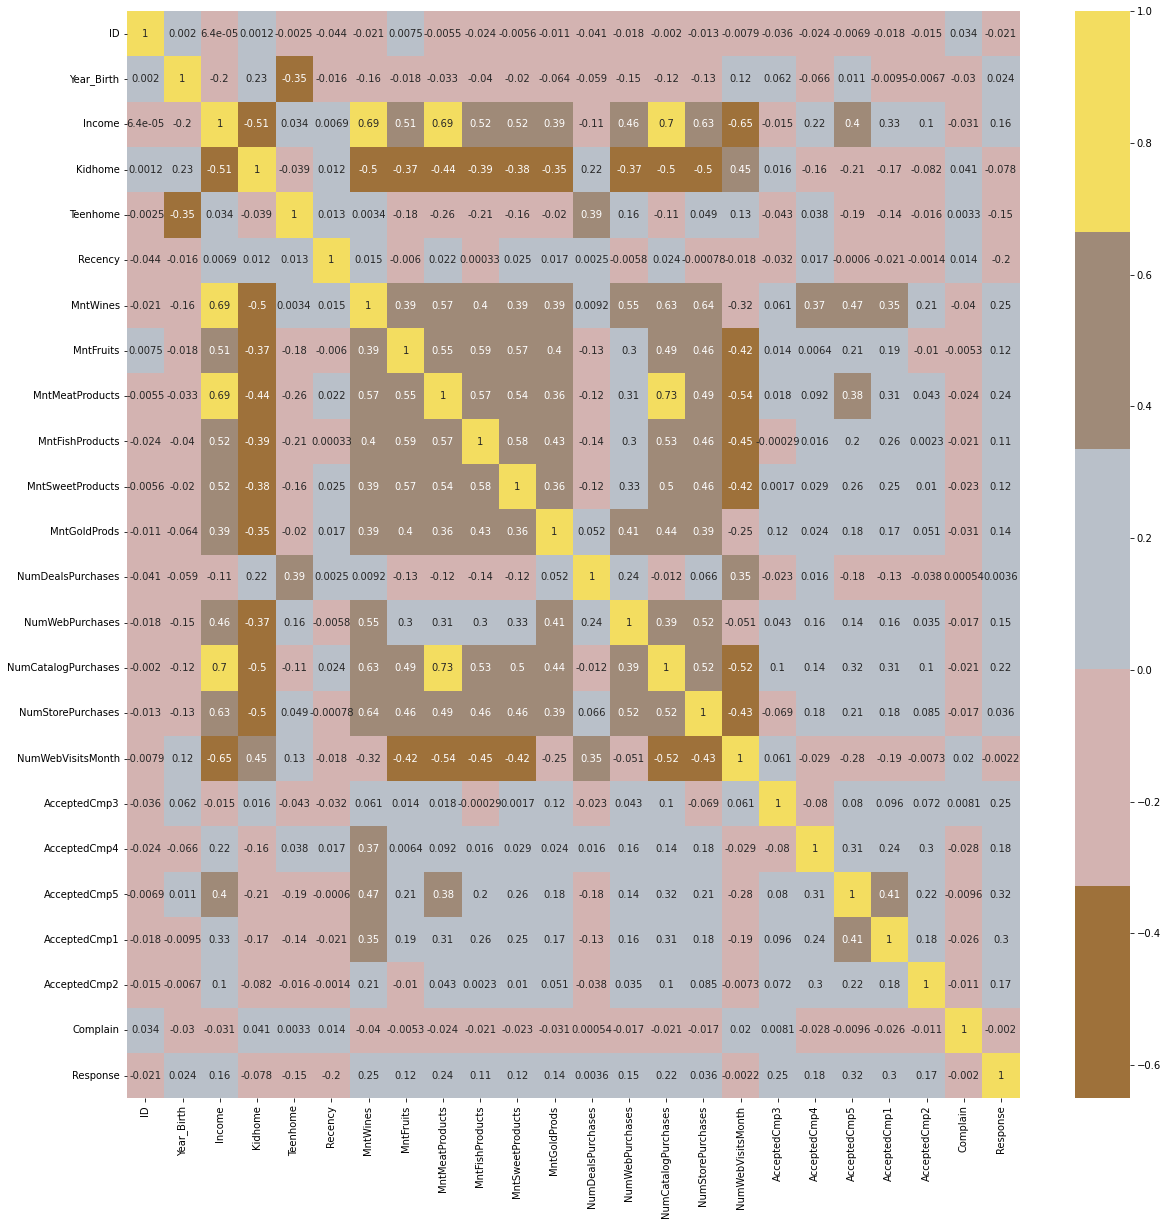

In [ ]:
pallet = ["#682F33", "#9E713A", "#D3B3B1", "#B9C0C9", "#9F8A78", "#F3DD60"]
cmap = colors.ListedColormap(pallet)
cm_plot = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_plot, annot=True, cmap =cmap, center=0)

In [ ]:
# Calculate the age from date of birth column

import datetime

today = datetime.date.today()

df['Age'] = today.year - df['Year_Birth']

df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,42


In [ ]:
# Calculate how long the customers have been with the company

import datetime
today = datetime.date.today()

df['Dt_Customer'] =  pd.DatetimeIndex(df['Dt_Customer']).year


df['enrollment_Years'] = today.year - df['Dt_Customer']

In [ ]:
# Combine the total number of times when the customer accepted the offer in the all campaigns.

df['NumAccepted_1st_fiveCamps'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# Count total number of kids and teenagers as Children
df['Children'] = df['Kidhome']+df['Teenhome']

# Calculate average spent on all different products
df['Ave_Spend_on_products']= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']/6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2215 non-null   int64  
 1   Year_Birth                 2215 non-null   int64  
 2   Education                  2215 non-null   object 
 3   Marital_Status             2215 non-null   object 
 4   Income                     2215 non-null   float64
 5   Kidhome                    2215 non-null   int64  
 6   Teenhome                   2215 non-null   int64  
 7   Dt_Customer                2215 non-null   int64  
 8   Recency                    2215 non-null   int64  
 9   MntWines                   2215 non-null   int64  
 10  MntFruits                  2215 non-null   int64  
 11  MntMeatProducts            2215 non-null   int64  
 12  MntFishProducts            2215 non-null   int64  
 13  MntSweetProducts           2215 non-null   int64

In [ ]:
# Classify marital_status into 2 main categories: partner and single
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner',
                                               'Married': 'Partner',
                                               'Divorced': 'Single',
                                               'Widow': 'Single',
                                               'Alone': 'Single',
                                               'Absurd': 'Single',
                                               'YOLO': 'Single'})

<function matplotlib.pyplot.show(close=None, block=None)>

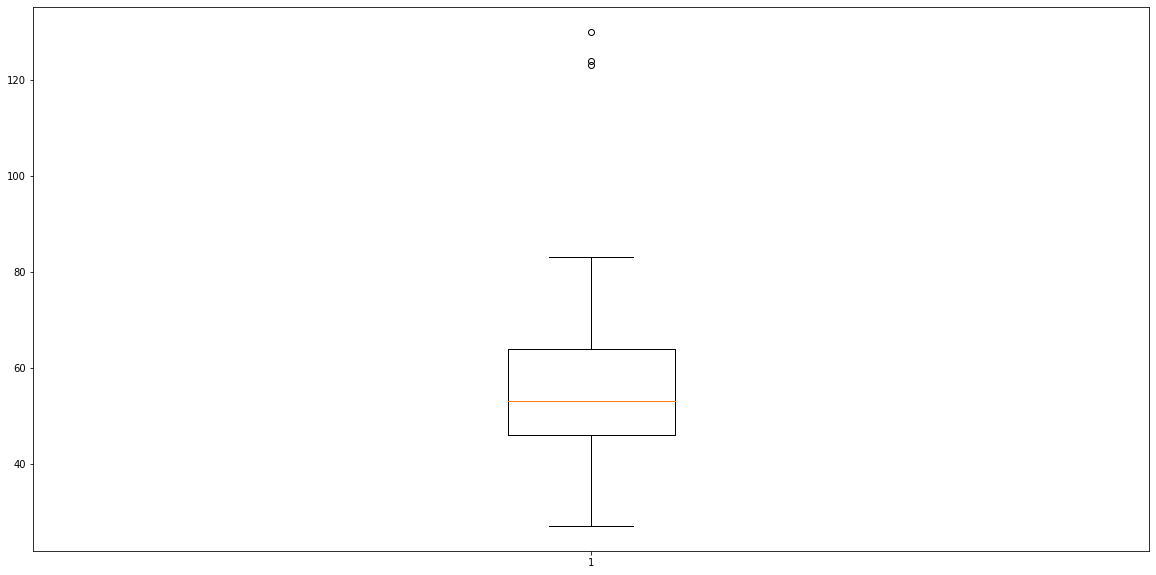

In [ ]:
# Visualize the Age column
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
plt.boxplot(df['Age'])
plt.show

In [ ]:
df['Age'].describe()

count    2215.000000
mean       54.183296
std        11.987000
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [ ]:
# Remove outlier in age columns (those with age greater than 80s)
df.drop(df.index[df['Age'] >80], inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

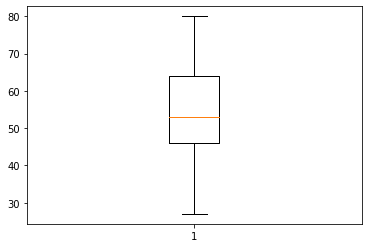

In [ ]:
plt.boxplot(df['Age'])
plt.show

In [ ]:
# Categorize Age into different age groups
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'AgeGroup'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age']<= 39), 'AgeGroup'] = 'Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df.loc[(df['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [ ]:
# Display unique values in 2 columns: Education and marital_status
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Partner']


In [ ]:
df ['Education'] = df['Education'].map({'Graduation': 'Graduated', 'PhD': 'Postgraduated', 'Master': 'Postgraduated', '2n Cycle': 'Pregraduated', 'Basic': 'Pregraduated'})

In [ ]:
# Identify to be drop columns
df = df.drop(['Year_Birth','Dt_Customer','ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response', 'Kidhome', 'Teenhome', 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts', 'MntGoldProds', 'Age', 'Complain'], axis =1)

In [ ]:
# Convert categorical columns to numeric columns
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Education', 'Marital_Status', 'AgeGroup']

encoder = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: encoder.fit_transform(col))
df[categorical_cols].head(10)

,Education,Marital_Status,AgeGroup
0,0,1,2
1,0,1,2
2,0,0,1
3,0,0,0
4,1,0,1
5,1,0,1
6,0,1,1
7,1,0,0
8,1,0,1
9,1,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2210 non-null   int64  
 1   Marital_Status             2210 non-null   int64  
 2   Income                     2210 non-null   float64
 3   Recency                    2210 non-null   int64  
 4   NumDealsPurchases          2210 non-null   int64  
 5   NumWebPurchases            2210 non-null   int64  
 6   NumCatalogPurchases        2210 non-null   int64  
 7   NumStorePurchases          2210 non-null   int64  
 8   NumWebVisitsMonth          2210 non-null   int64  
 9   enrollment_Years           2210 non-null   int64  
 10  NumAccepted_1st_fiveCamps  2210 non-null   int64  
 11  Children                   2210 non-null   int64  
 12  Ave_Spend_on_products      2210 non-null   float64
 13  AgeGroup                   2210 non-null   int64

<AxesSubplot:>

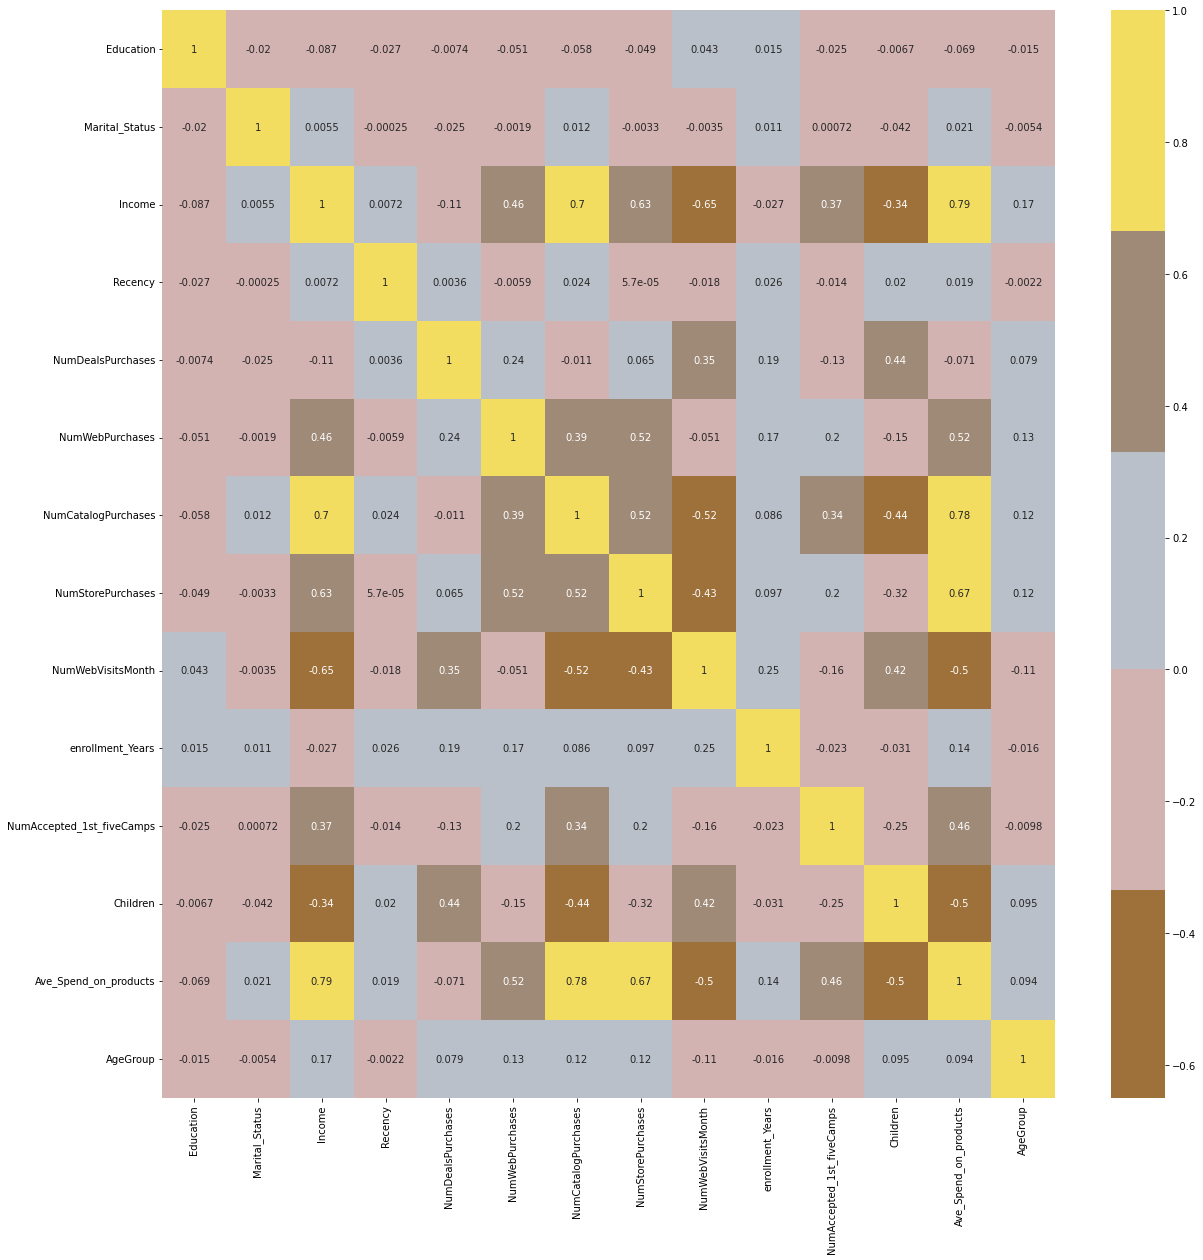

In [ ]:
pallet = ["#682F33", "#9E713A", "#D3B3B1", "#B9C0C9", "#9F8A78", "#F3DD60"]
cmap = colors.ListedColormap(pallet)
cm_plot = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_plot, annot=True, cmap =cmap, center=0)

# Exploratory Data Analysis

In [ ]:
# Marital Status
maritalstatus = df.Marital_Status.value_counts()

fig = px.pie(maritalstatus,
             values = maritalstatus.values,
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

the pie chart above shows that 64.6% are having partners(1) while 35.4% are single(0)

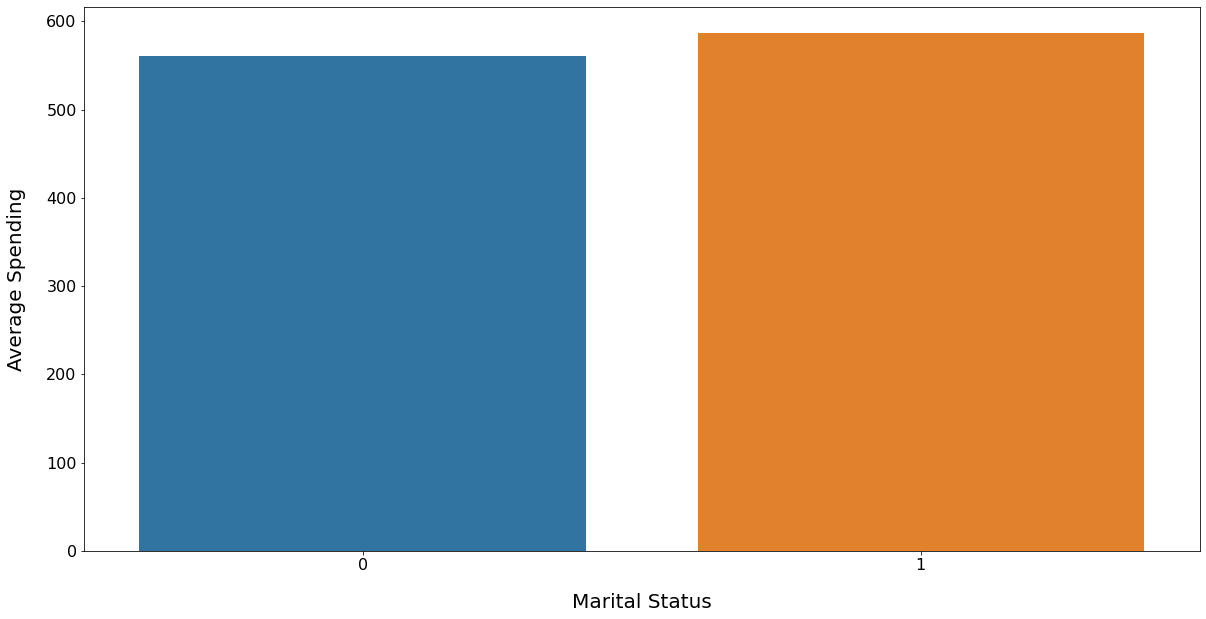

In [ ]:
# Average spending : Marital Status
maritalspending = df.groupby('Marital_Status')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Marital Status", y="Average Spending");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Marital Status', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);


The average spending of single people (0) is slightly lower than the average spending of not single people.

In [ ]:
# Education level
education = df.Education.value_counts()

fig = px.pie(education,
             values = education.values,
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


0 (graduate stud): 50.5 %
1(post grad ): 38.1%
2 (under grad) : 11.4%
Almost half of all customers have achieved a college degree. Only 11.4% of customers consist of people in college or without a college degree.


In [ ]:
# child status
children = df.Children.value_counts()

fig = px.pie(children,
             values = children.values,
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

About 50% of customers have 1 child
28.5% = 0 child
18.8% = 2 children
2.26% = 3 children

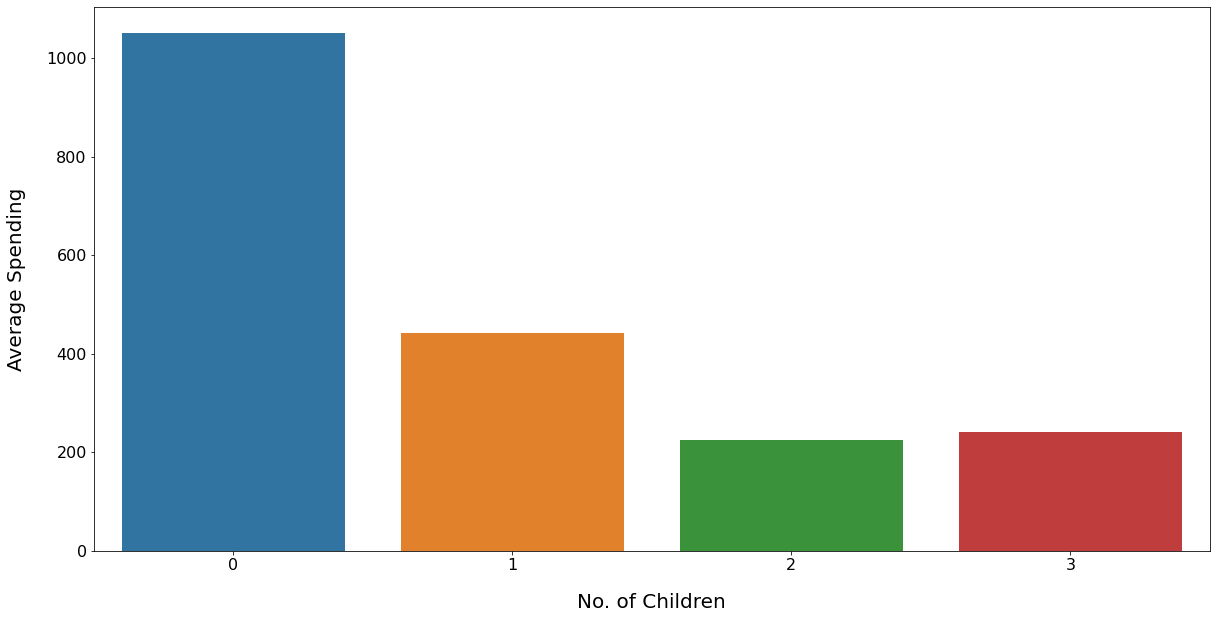

In [ ]:
childrenspending = df.groupby('Children')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

People with no children are more likely to spend more money than people with 1, 2 or 3 children.

In [ ]:
# categorize into age group
agegroup = df.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent + label',
                  hole = 0.75,
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'],
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups',
                                      x = 0.5, y = 0.5, font_size = 36, showarrow = False,
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

The majority of customers consist of middle age to senior adults. More than 50% of customers are middle age adults.

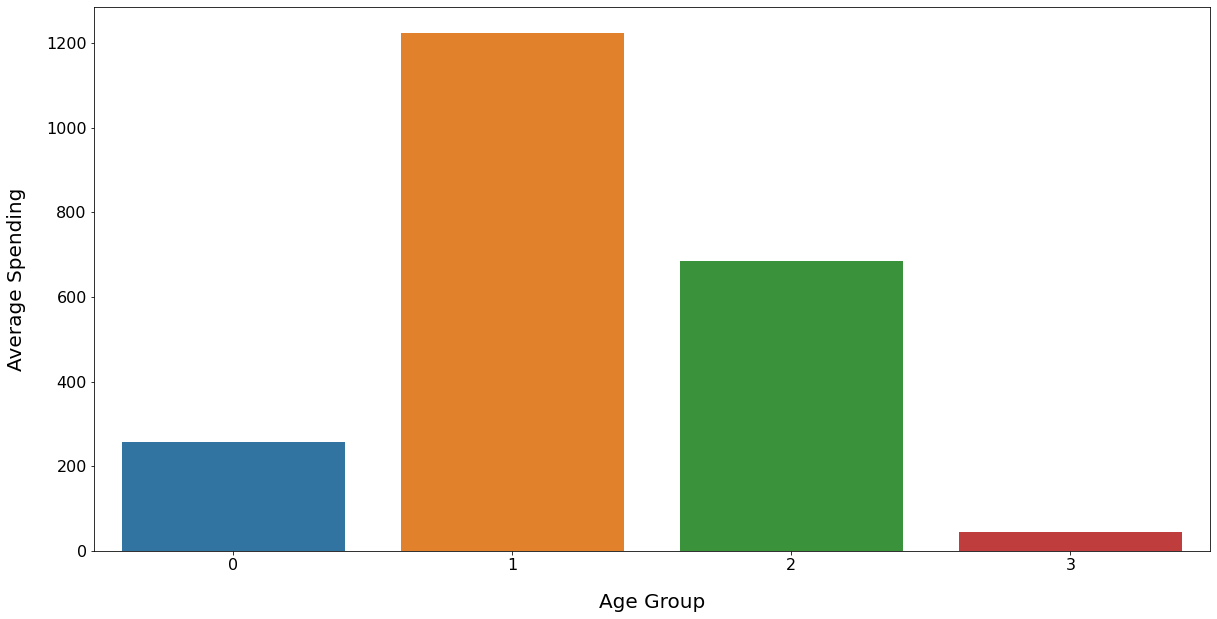

In [ ]:
# Average Spendings vs Age group
agegroupspending = df.groupby('AgeGroup')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Age Group", y='Average Spending');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age Group', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Most average spending comes from the middle age and senior adults and followed by younger people or teens. The highest average spending is above 1200.

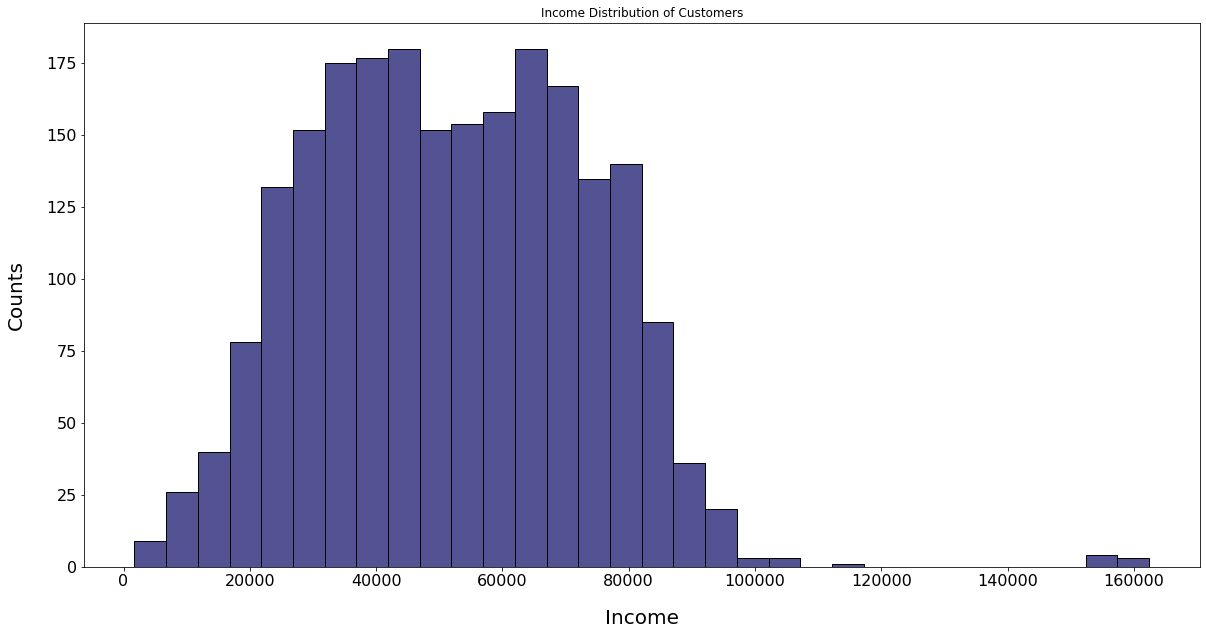

In [ ]:
# Income Distribution of Customer
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = df.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

there are outliers but the distibution with most most customers earinig between 25000 and 85000

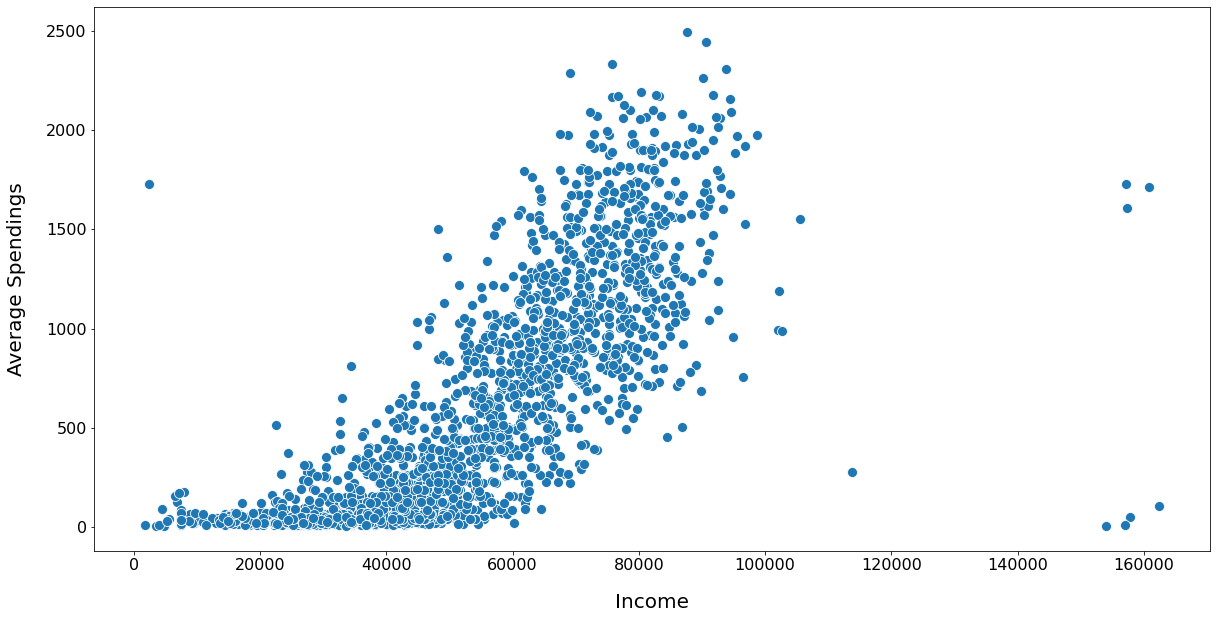

In [ ]:
# Income vs Spendings
plt.figure(figsize=(20,10))

sns.scatterplot(x= df.Income, y= df.Ave_Spend_on_products, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Average Spendings', fontsize=20, labelpad=20);

The relationship between the average spendings and income has a strong linear relationship which indication a postive correlation and the more income of the customers the more they tend to spend more money on the products in this company.

## **PCA**

In [ ]:
data_scaled = df.copy()
scale_cols = ['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'enrollment_Years', 'NumAccepted_1st_fiveCamps', 'Children', 'Ave_Spend_on_products','AgeGroup']

In [ ]:
# Perform data scaling using StandardScaler
ss = StandardScaler()
for col in scale_cols:
    data_scaled[col] = ss.fit_transform(data_scaled[[col]])
display(data_scaled.shape, data_scaled.head(3))

(2210, 14)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,enrollment_Years,NumAccepted_1st_fiveCamps,Children,Ave_Spend_on_products,AgeGroup
0,-0.892797,1.349992,0.288058,0.311636,0.350167,1.426935,2.507090,-0.555973,0.691484,1.498446,-0.438818,-1.266087,1.678154,1.140922
1,-0.892797,1.349992,-0.260133,-0.379777,-0.169557,-1.125937,-0.571059,-1.171092,-0.133222,-1.416665,-0.438818,1.403810,-0.944931,1.140922
2,-0.892797,-0.740745,0.914383,-0.794624,-0.689280,1.426935,-0.229043,1.289385,-0.545575,0.040891,-0.438818,-1.266087,0.294498,-0.347530


In [ ]:
# Fit the standardized data using PCA
from sklearn.decomposition import PCA
variance_ratio = {}
for i in range(1, len(data_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(data_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

In [ ]:
 # PCA variance ratio
 pca.explained_variance_ratio_

array([0.30598304, 0.12528794, 0.08370289, 0.07366611, 0.07143336,
       0.06937187, 0.06198152, 0.05871547, 0.04418573, 0.03398051,
       0.02855768, 0.01913929, 0.01453653, 0.00945806])

In [ ]:
variance_ratio

{'n_1': 0.3059830416375911,
 'n_2': 0.4312709781417101,
 'n_3': 0.5149738728312535,
 'n_4': 0.5886399843489205,
 'n_5': 0.6600733436394228,
 'n_6': 0.7294452151607617,
 'n_7': 0.7914267371355151,
 'n_8': 0.8501422039406598,
 'n_9': 0.8943279331418632,
 'n_10': 0.9283084384872745,
 'n_11': 0.9568661217344391,
 'n_12': 0.9760054136740172,
 'n_13': 0.9905419399000593,
 'n_14': 1.0}

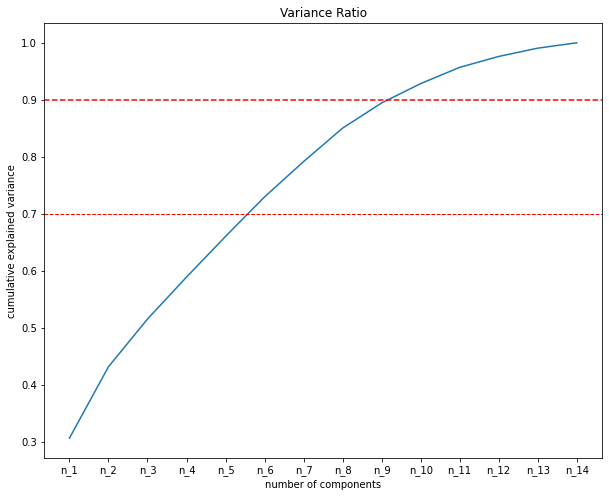

In [ ]:
plt.figure(figsize = (10,8))

plt.plot(variance_ratio.keys(), variance_ratio.values())
plt.axhline(0.7, color = 'red', ls = '--', lw = 1)
plt.axhline(0.9, color = 'red', ls = '--', lw = 1.5)
plt.title("Variance Ratio")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

The graph shows the amount of variance depending on the number of components. Here, we want to preserve around 80 % of the variance. So, in this case, we decide to keep 8 components.

In [ ]:
# Eigenvector per each PC - From the graph choose 8 principal components
data_pca8 = pd.DataFrame(pca.components_[0:8],
                         columns=data_scaled.columns,
                         index = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']).T
data_pca8

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Education,-0.042911,-0.035683,-0.184608,0.622308,-0.112724,0.705597,0.216404,-0.122504
Marital_Status,0.009365,-0.033613,-0.140356,-0.435753,0.768640,0.400878,0.168680,-0.088283
Income,0.427404,0.011458,0.162010,0.003021,0.002825,0.001100,0.034070,-0.075336
Recency,0.005546,0.018698,0.023849,-0.637261,-0.612272,0.420121,0.179821,-0.003652
NumDealsPurchases,-0.075323,0.609188,0.121783,0.020541,0.013682,-0.031439,0.168678,-0.290732
NumWebPurchases,0.265704,0.424232,-0.041204,0.039987,0.038306,-0.041862,0.065569,-0.124404
NumCatalogPurchases,0.403030,0.047106,-0.016566,-0.011726,-0.024196,0.029807,-0.008834,-0.003665
NumStorePurchases,0.366497,0.183407,0.049095,0.033594,-0.000065,0.040626,-0.153532,-0.256588
NumWebVisitsMonth,-0.325154,0.342991,-0.282064,0.002952,0.024306,-0.092897,0.152757,0.179473
enrollment_Years,0.021431,0.387327,-0.526272,-0.059850,-0.051933,0.108402,-0.428792,0.388523


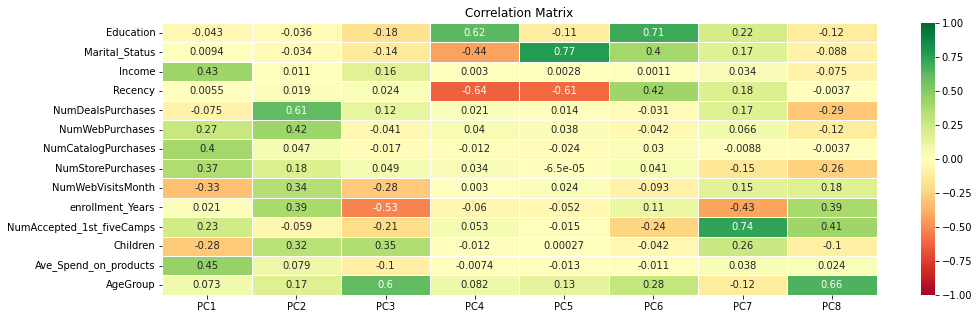

In [ ]:
# Plot the correlation matrix
import seaborn as sns
plt.figure(figsize = (16,5))
s = sns.heatmap(
    data_pca8,
    vmin=-1,
    vmax=1,
    cmap='RdYlGn',
    annot=True,
    linewidths=.5
)
plt.title('Correlation Matrix')
plt.show()

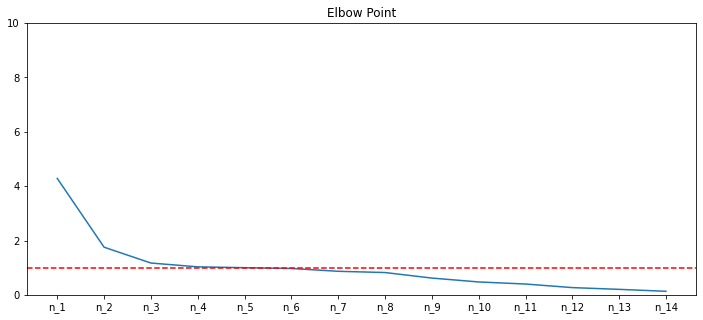

In [ ]:
# Eigen value
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))
plt.plot(variance_ratio.keys(), eigen_value)
plt.ylim(0, 10, 1)
plt.axhline(1, color = 'red', ls = '--')
plt.title('Elbow Point')
plt.show()

In [ ]:
print(f'the number of Eigenvalue greater than one: {len(eigen_value[eigen_value > 1])}')


the number of Eigenvalue greater than one: 5


In [ ]:
pca = PCA(n_components = 8, random_state = 42)

pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled),
                        columns = (["PC1", "PC2", "PC3", "PC4", "PC5", 'PC6', 'PC7', 'PC8']))

data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2210.0,2.572100e-17,2.070194,-5.501043,-1.878792,-0.445067,1.731650,6.346339
PC2,2210.0,9.966889e-17,1.324698,-3.496775,-0.938462,-0.202840,0.775224,5.712125
PC3,2210.0,-3.697394e-17,1.082761,-3.520550,-0.734548,0.033290,0.773613,3.545778
PC4,2210.0,4.018907e-18,1.015772,-2.389773,-0.750796,0.004476,0.685008,2.969261
PC5,2210.0,2.089832e-17,1.000260,-2.098629,-0.775952,-0.018731,0.603914,2.439983
PC6,2210.0,6.108738e-17,0.985721,-3.232939,-0.732779,-0.012663,0.672890,3.268782
PC7,2210.0,2.893613e-17,0.931737,-2.307300,-0.649319,-0.085962,0.492192,4.215222
PC8,2210.0,2.170210e-17,0.906856,-3.035782,-0.608479,-0.028662,0.575223,3.722263
